## SPAM SMS ANALYSIS

In [1]:
## Importing Libraries in Python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Loading the Datasets

data = pd.read_csv('C:/Users/Humza Ali/OneDrive/Documents/Data/Practise/SpamSMSCollection', sep = '\t', names=["label",'message'])

In [4]:
data.columns

Index(['label', 'message'], dtype='object')

In [5]:
data.shape

(5572, 2)

In [6]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0, 0.5, 'Count')

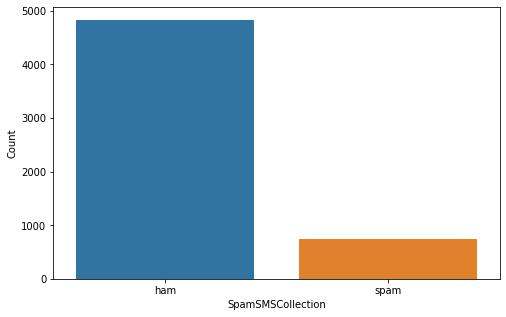

In [8]:
## Visualising the count of Spam message in the datasets
plt.figure(figsize = (8,5))
sns.countplot(x = "label", data=data)
plt.xlabel("SpamSMSCollection")
plt.ylabel("Count")

In [9]:
## Importing Essential Libraries for NLP of SPAM SMS datasets

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Humza
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
## Cleaning the Datsets

corpus = []
ps = PorterStemmer()

for i in range(0, data.shape[0]):
    
    ## Cleaning special character from message
    message = re.sub(pattern = '[a-zA-z]', repl = " ", string = data.message[i])
    
    ## Converting the entrire message in lower case
    message = message.lower()
    
    ## Tokkenizing the review by words
    words = message.split()
    
    #Removing the stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    ## Stemming the words
    words = [ps.stem(word) for word in words]
    
    ## Joining the stem words
    message = " ".join(words)
    
    ## Building a corpus of message
    corpus.append(message)

In [13]:
corpus[0:10]

[', .. ... ...',
 '... ...',
 "2 21 2005. 87121 ( ) & ' 08452810075 18'",
 '... ...',
 "' ,",
 "' 3 ' ! ' ? ! , £1.50",
 '. .',
 "' ( )' . *9",
 '!! £900 ! 09061701461. 341. 12 .',
 '11 ? ! 08002986030']

In [14]:
## Creating a Bag of word Model
    
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv= CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [16]:
## Extracting Dependent variable from datasets
y = pd.get_dummies(data['label'])
y = y.iloc[:,1].values

In [17]:
## Train and Test Split
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [19]:
## Fitting Naive Bayes to datasets
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
## Predicting on Test
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [22]:
## Accuracy Precison and Recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [23]:
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print('-----------------Scores-------------------')
print('Accuracy score is: {}%'.format(round(score1*100,2)))
print("Precison score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

-----------------Scores-------------------
Accuracy score is: 91.93%
Precison score is: 0.99
Recall score is: 0.44


In [25]:
## Confusing Matrix
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[954,   1],
       [ 89,  71]], dtype=int64)

Text(51.0, 0.5, 'Actual Values')

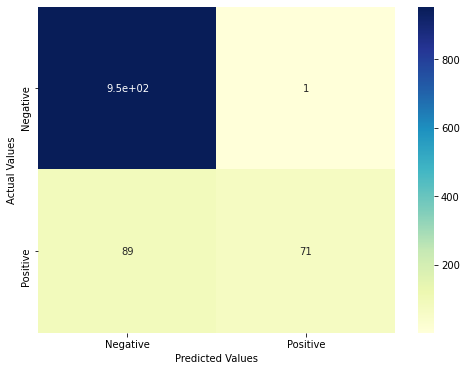

In [28]:
## Visualizing the Confusion Matrix
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative','Positive'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [38]:
## Tuning Hyperparameter of Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha = i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy of score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
        print("-------------------------")
        print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2), round(alpha_val,1)))

C:\Users\Humza Ali\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy of score for alpha=0.0 is: 96.5%
-------------------------
The best accuracy is 96.5% with alpha value as 0.0
Accuracy of score for alpha=0.1 is: 92.11%
Accuracy of score for alpha=0.2 is: 91.75%
Accuracy of score for alpha=0.3 is: 91.3%
Accuracy of score for alpha=0.4 is: 91.48%
Accuracy of score for alpha=0.5 is: 91.57%
Accuracy of score for alpha=0.6 is: 91.3%
Accuracy of score for alpha=0.7 is: 91.48%
Accuracy of score for alpha=0.8 is: 91.66%
Accuracy of score for alpha=0.9 is: 91.75%
Accuracy of score for alpha=1.0 is: 91.93%


In [46]:
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [47]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [48]:
# Predicting values
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('This is a SPAM message!')
else:
    print('This is a normal message.')

This is a normal message.


In [49]:
# Predicting values
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
    print('This is a SPAM message!')
else:
    print('This is a normal message.')

This is a normal message.


In [50]:
# Predicting values
sample_message = 'You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP.'

if predict_spam(sample_message):
    print('This is a SPAM message!')
else:
    print('This is a normal message.')

This is a normal message.


In [51]:
# Predicting values
sample_message = 'Free entry in 2 a wkly comp to win FA Cup final.'

if predict_spam(sample_message):
    print('This is a SPAM message!')
else:
    print('This is a normal message.')

This is a normal message.
